In [1]:
#matplotlib ipympl
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as stats
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import os

In [2]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

In [4]:
D = 101
interaction_pattern = "r"
cwd = os.getcwd()

5000
5000
5000
5000
5000
5000
5000
5000
5000


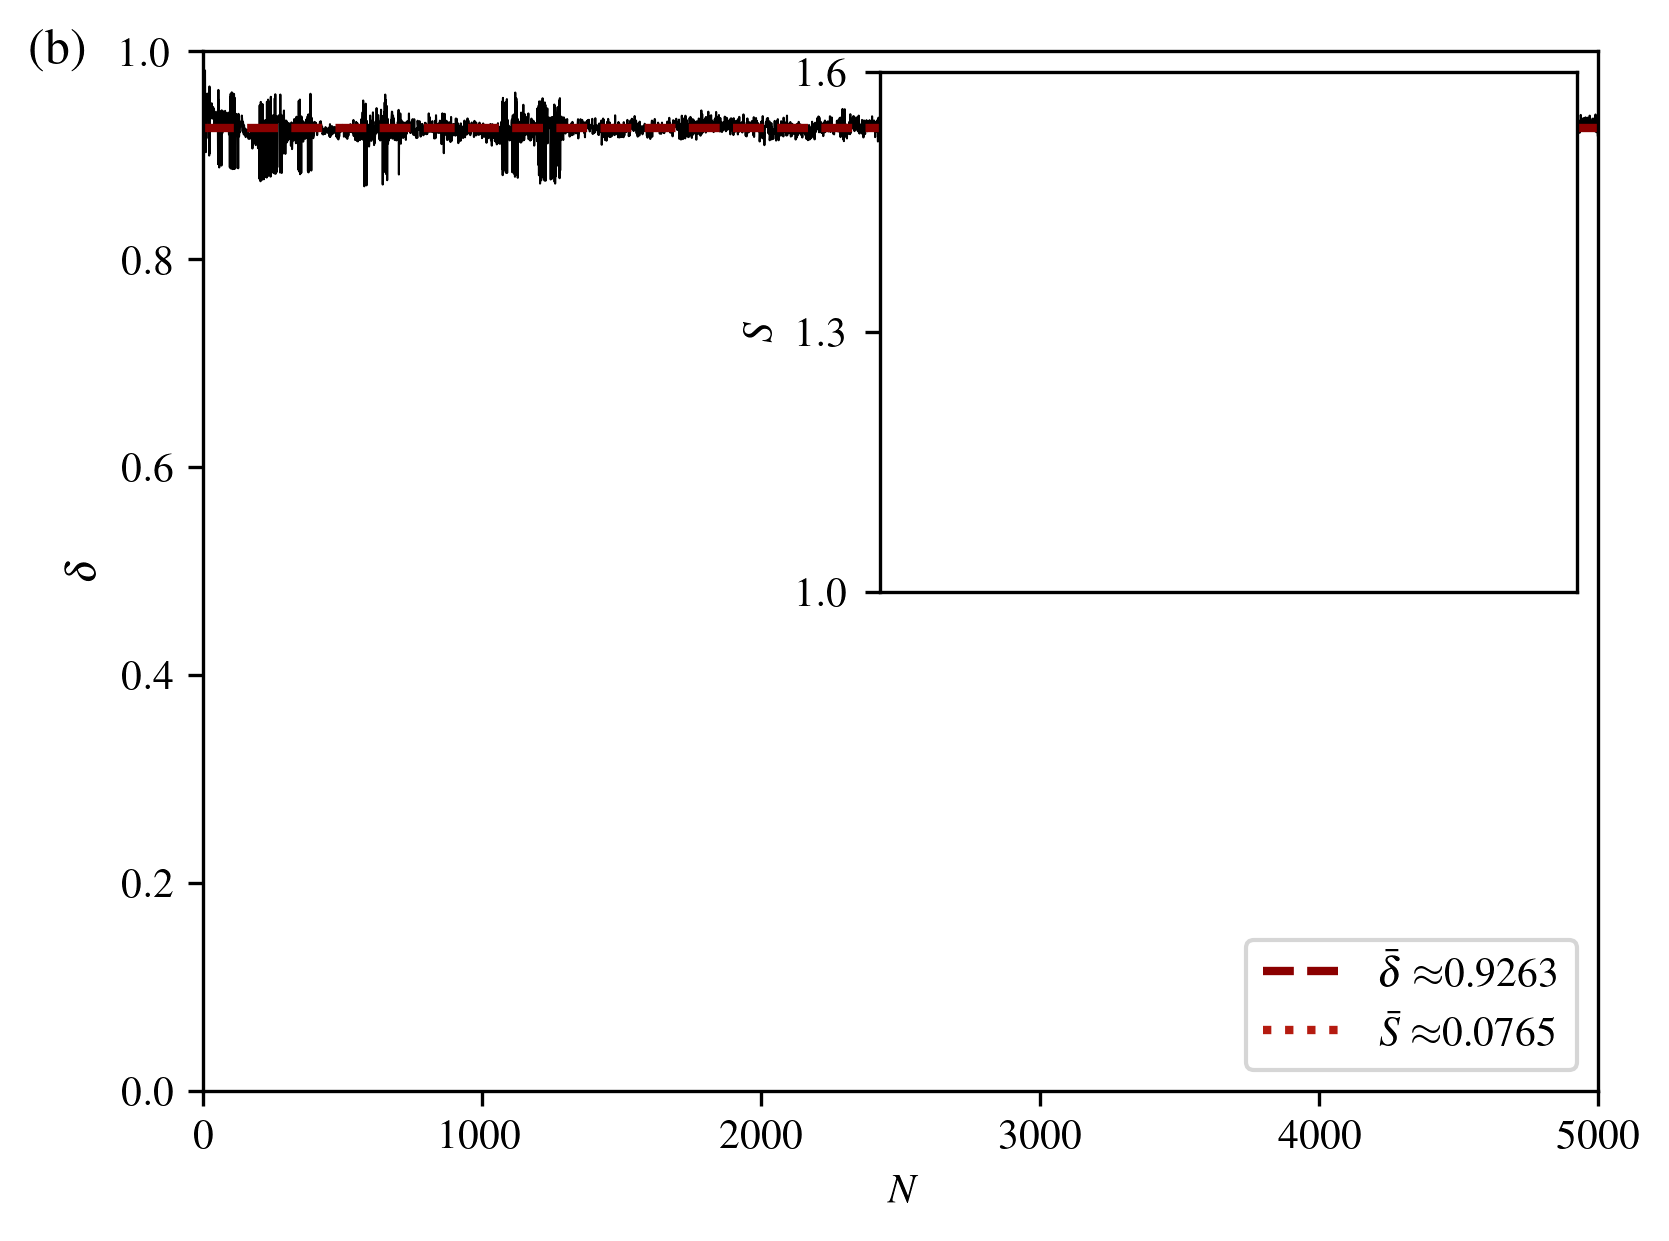

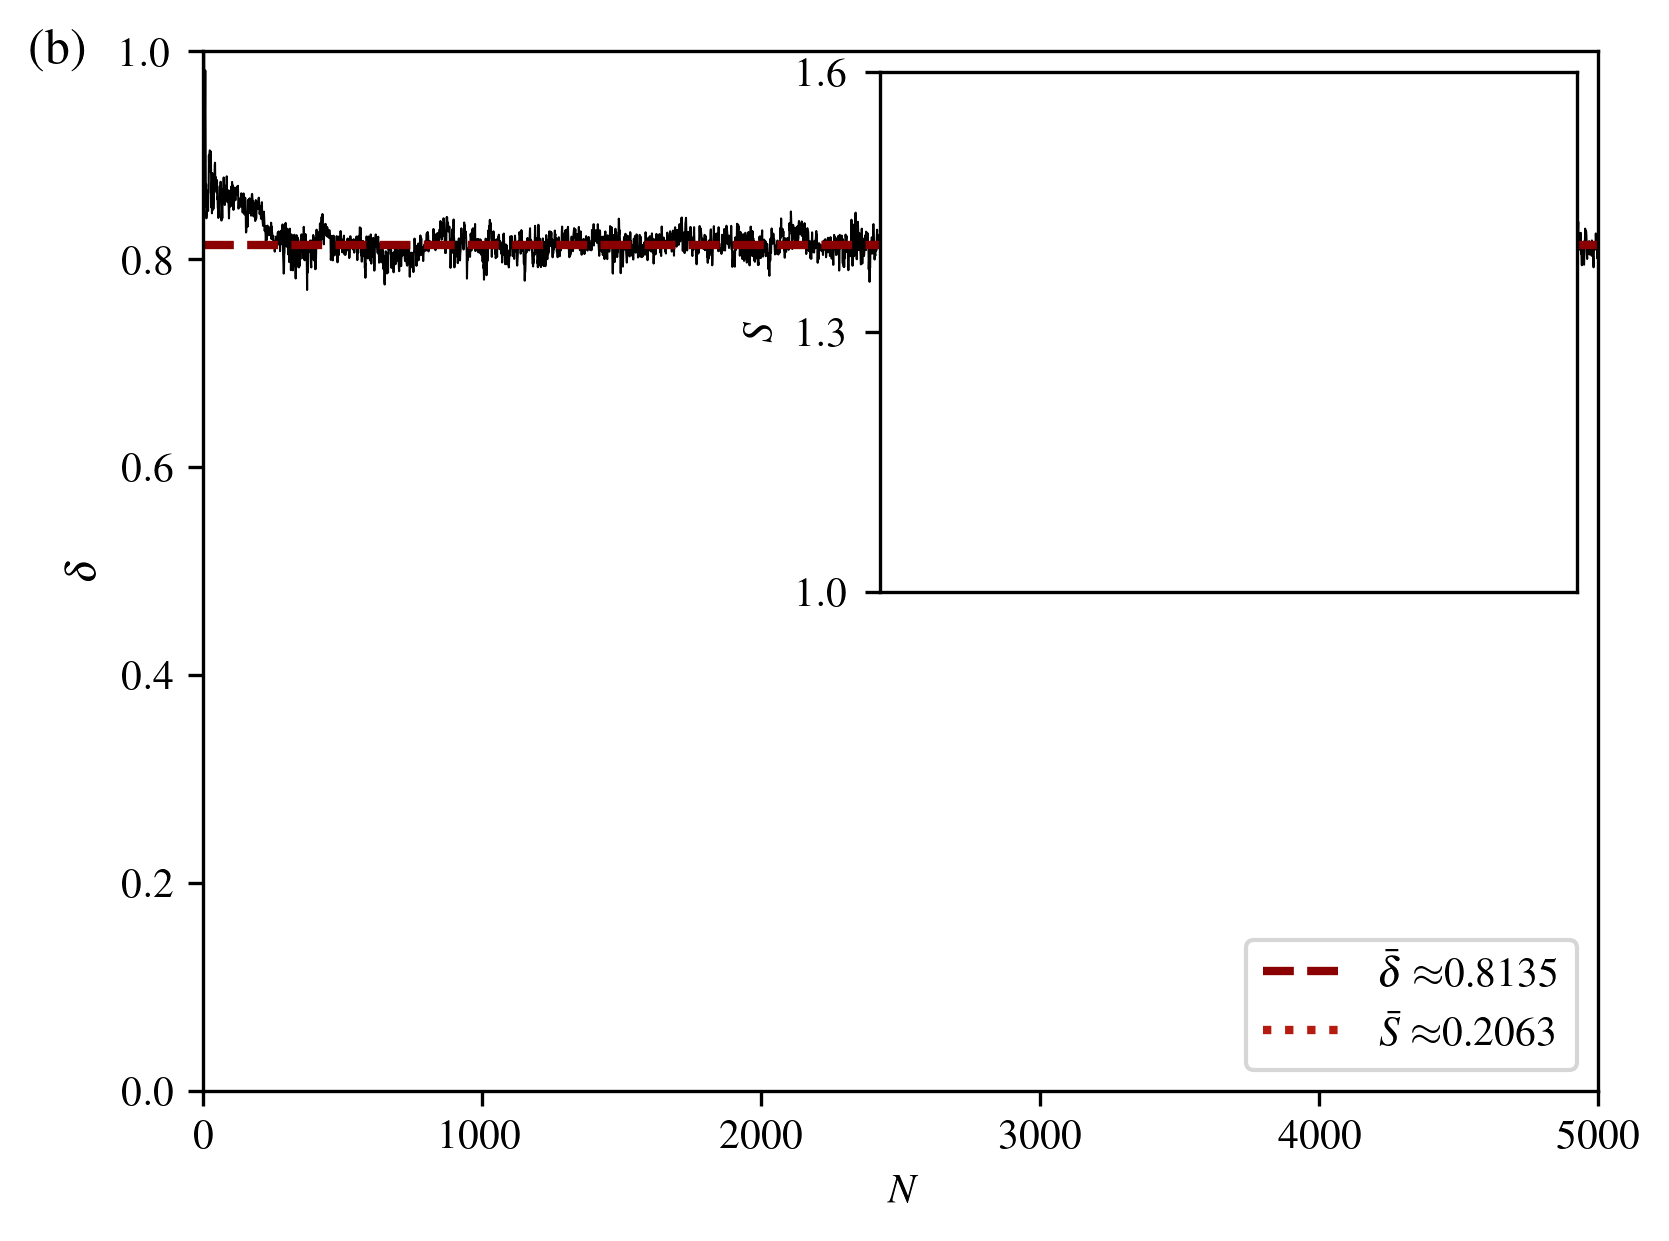

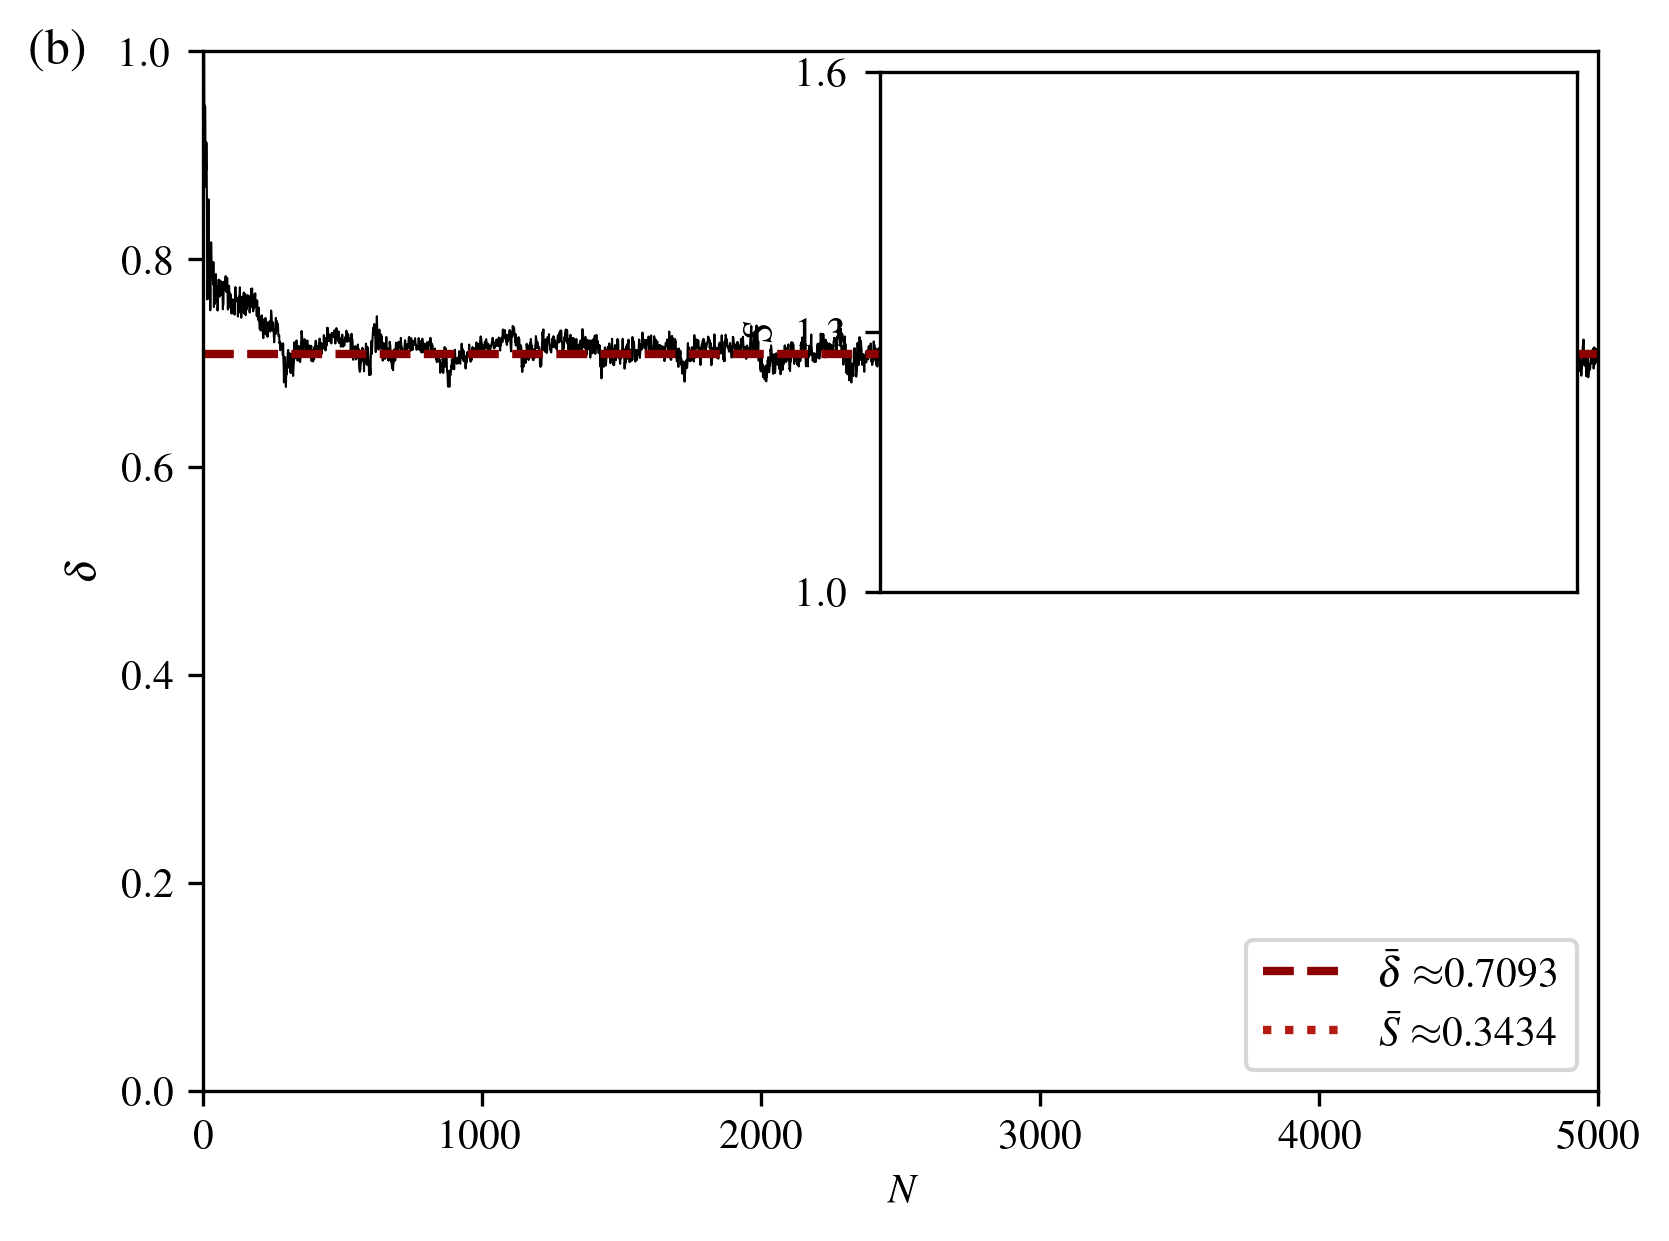

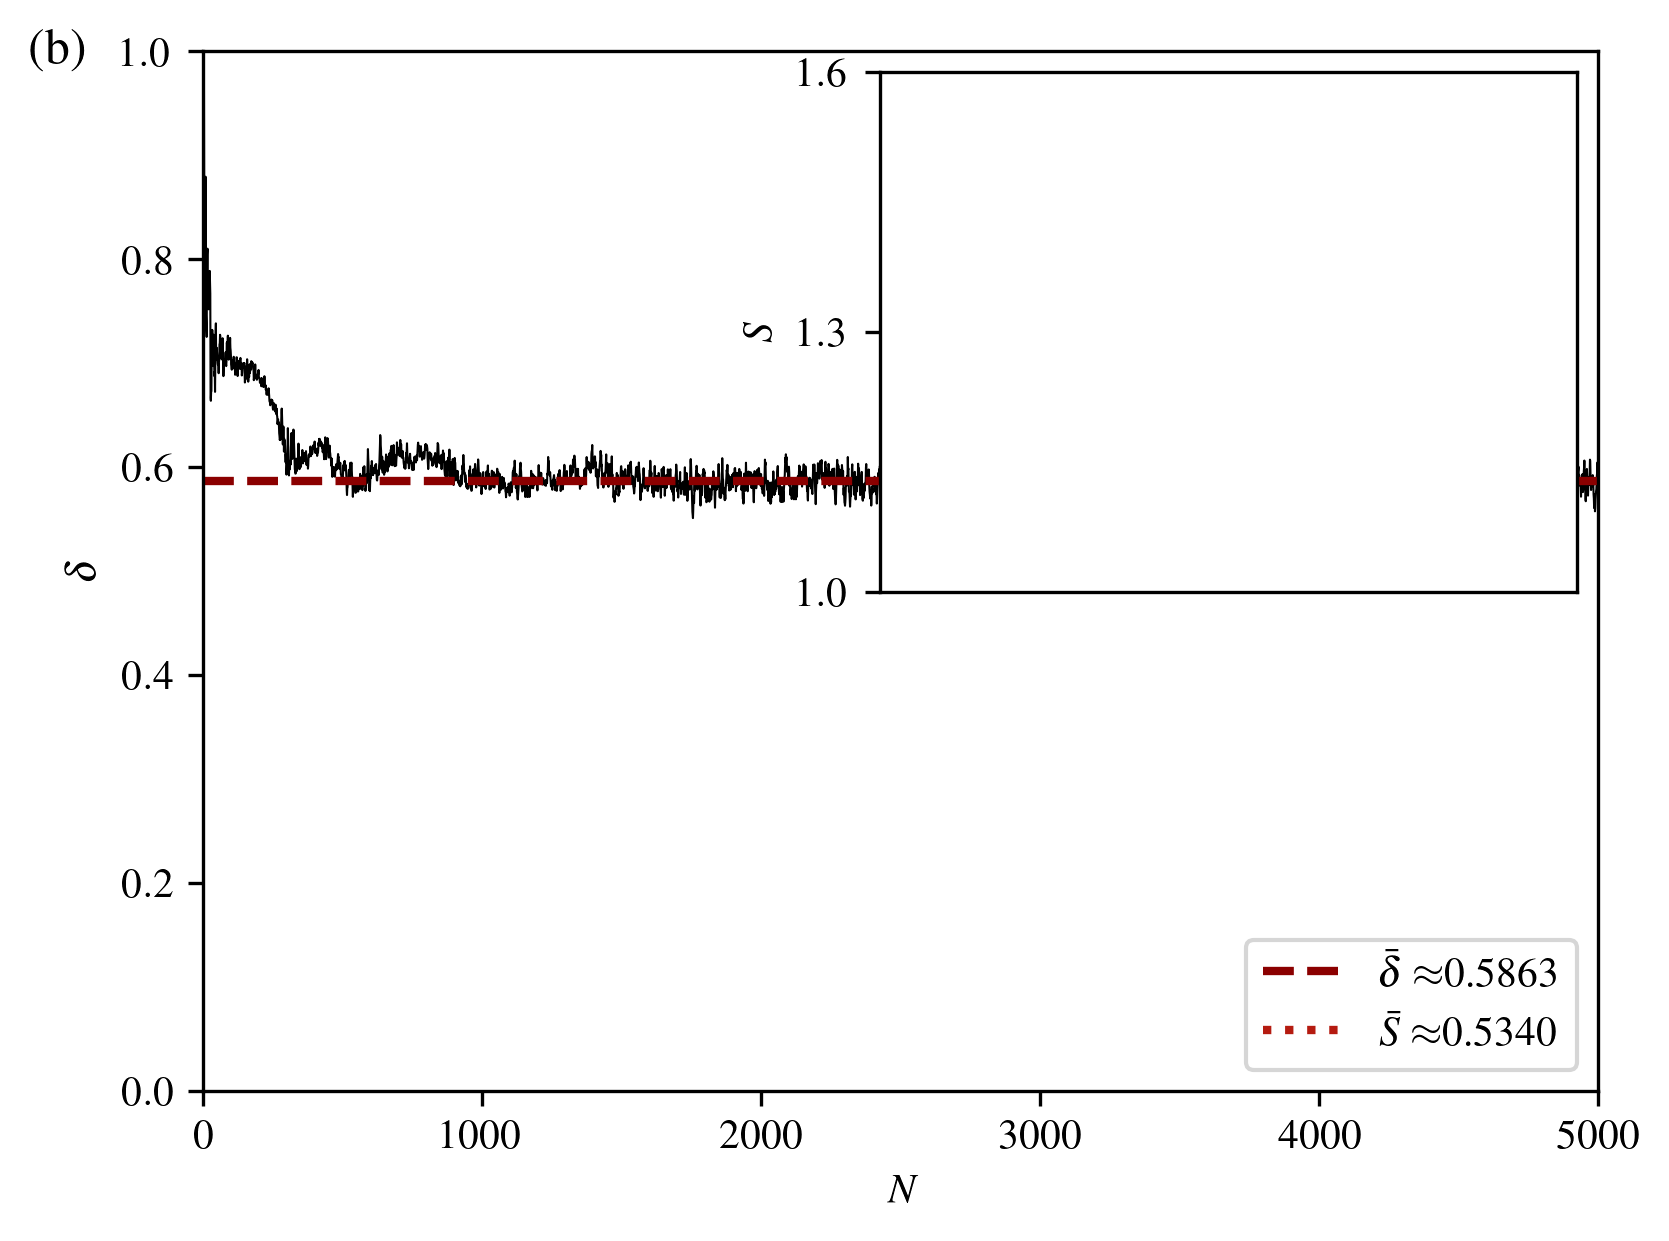

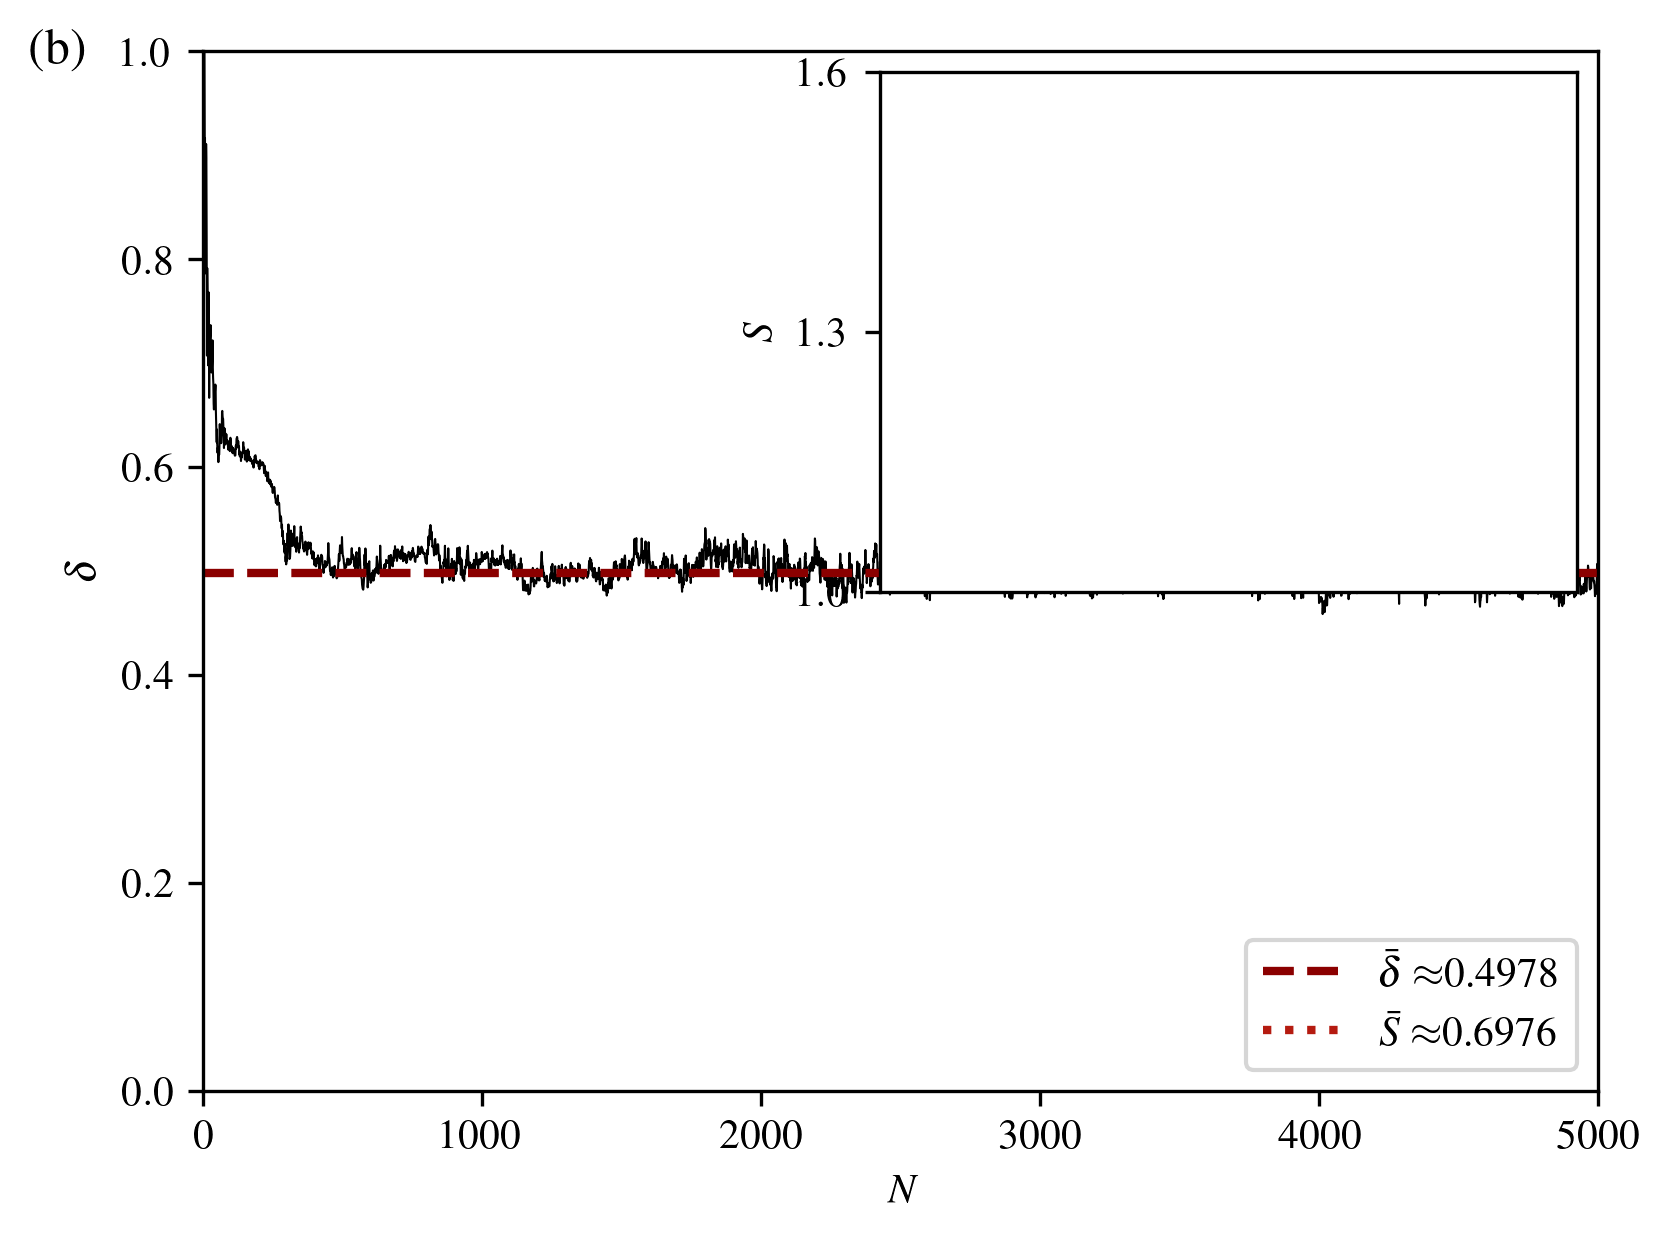

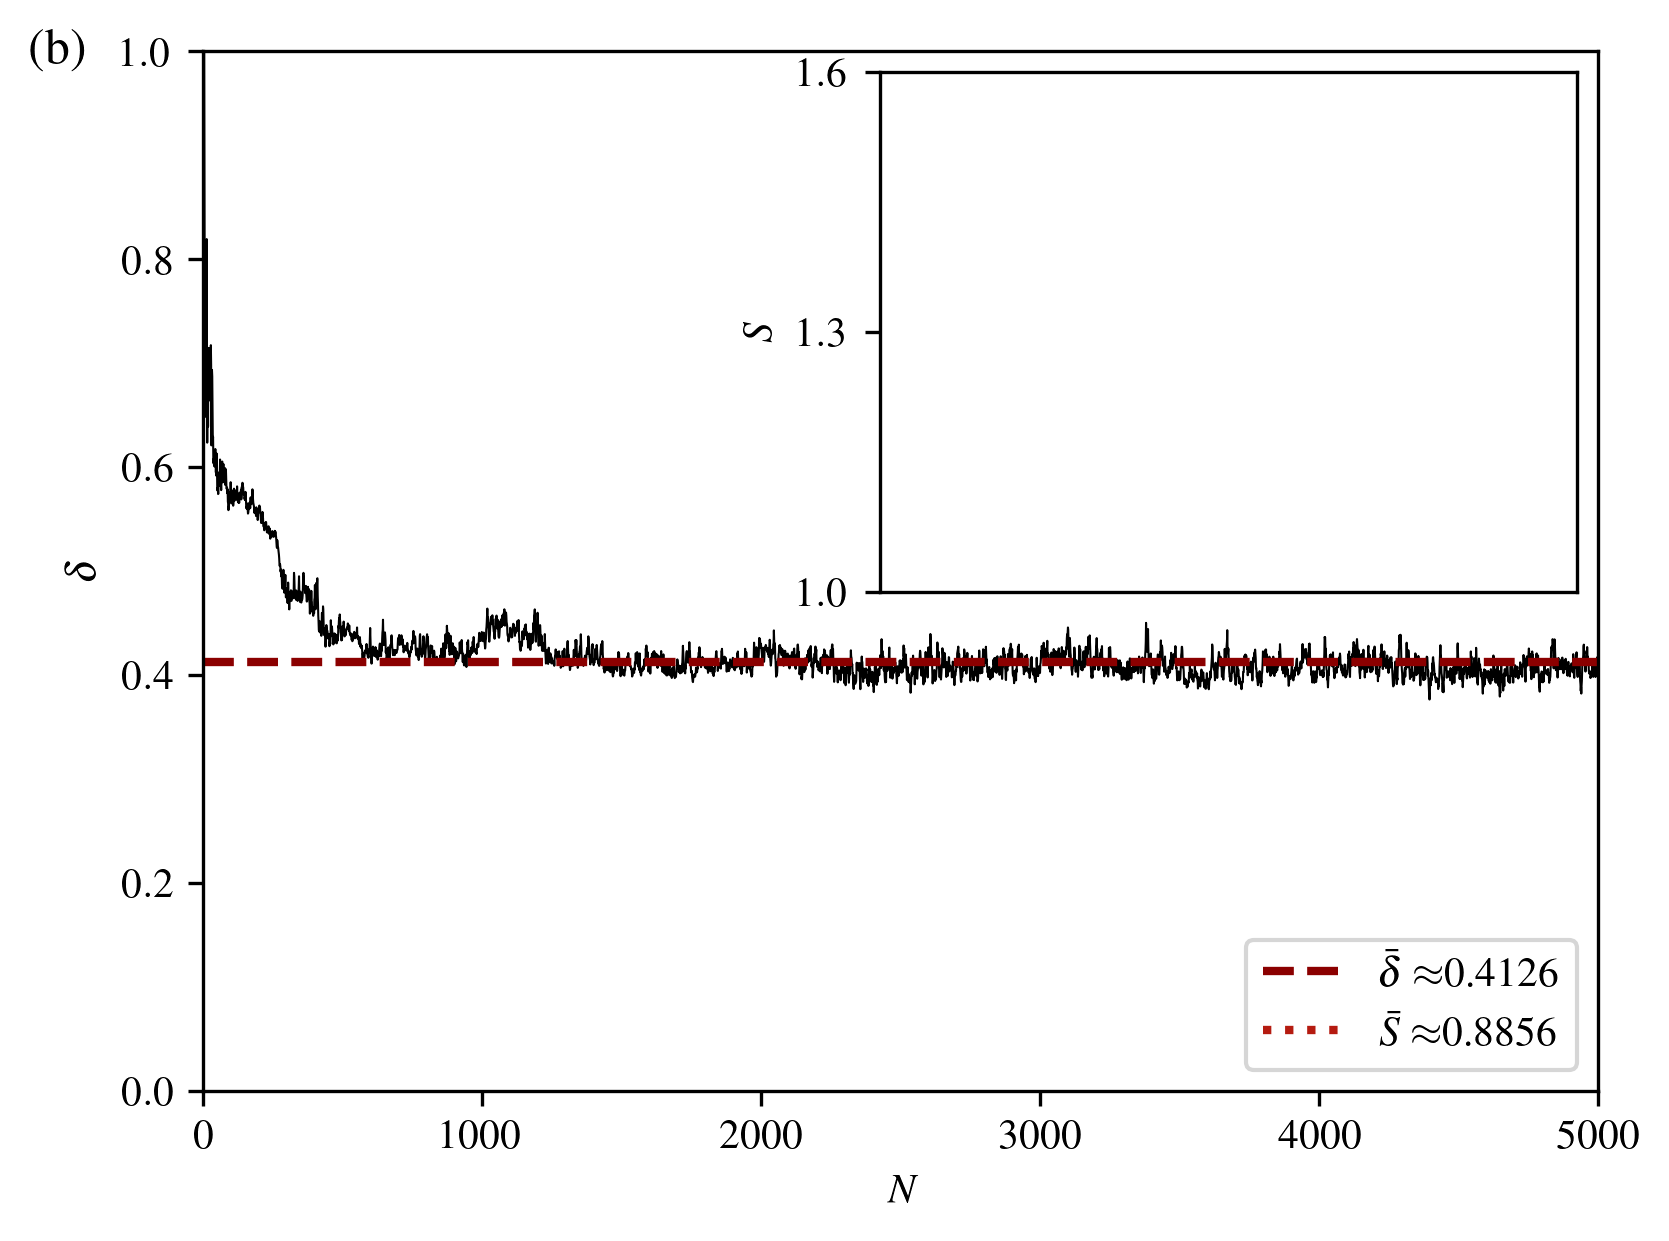

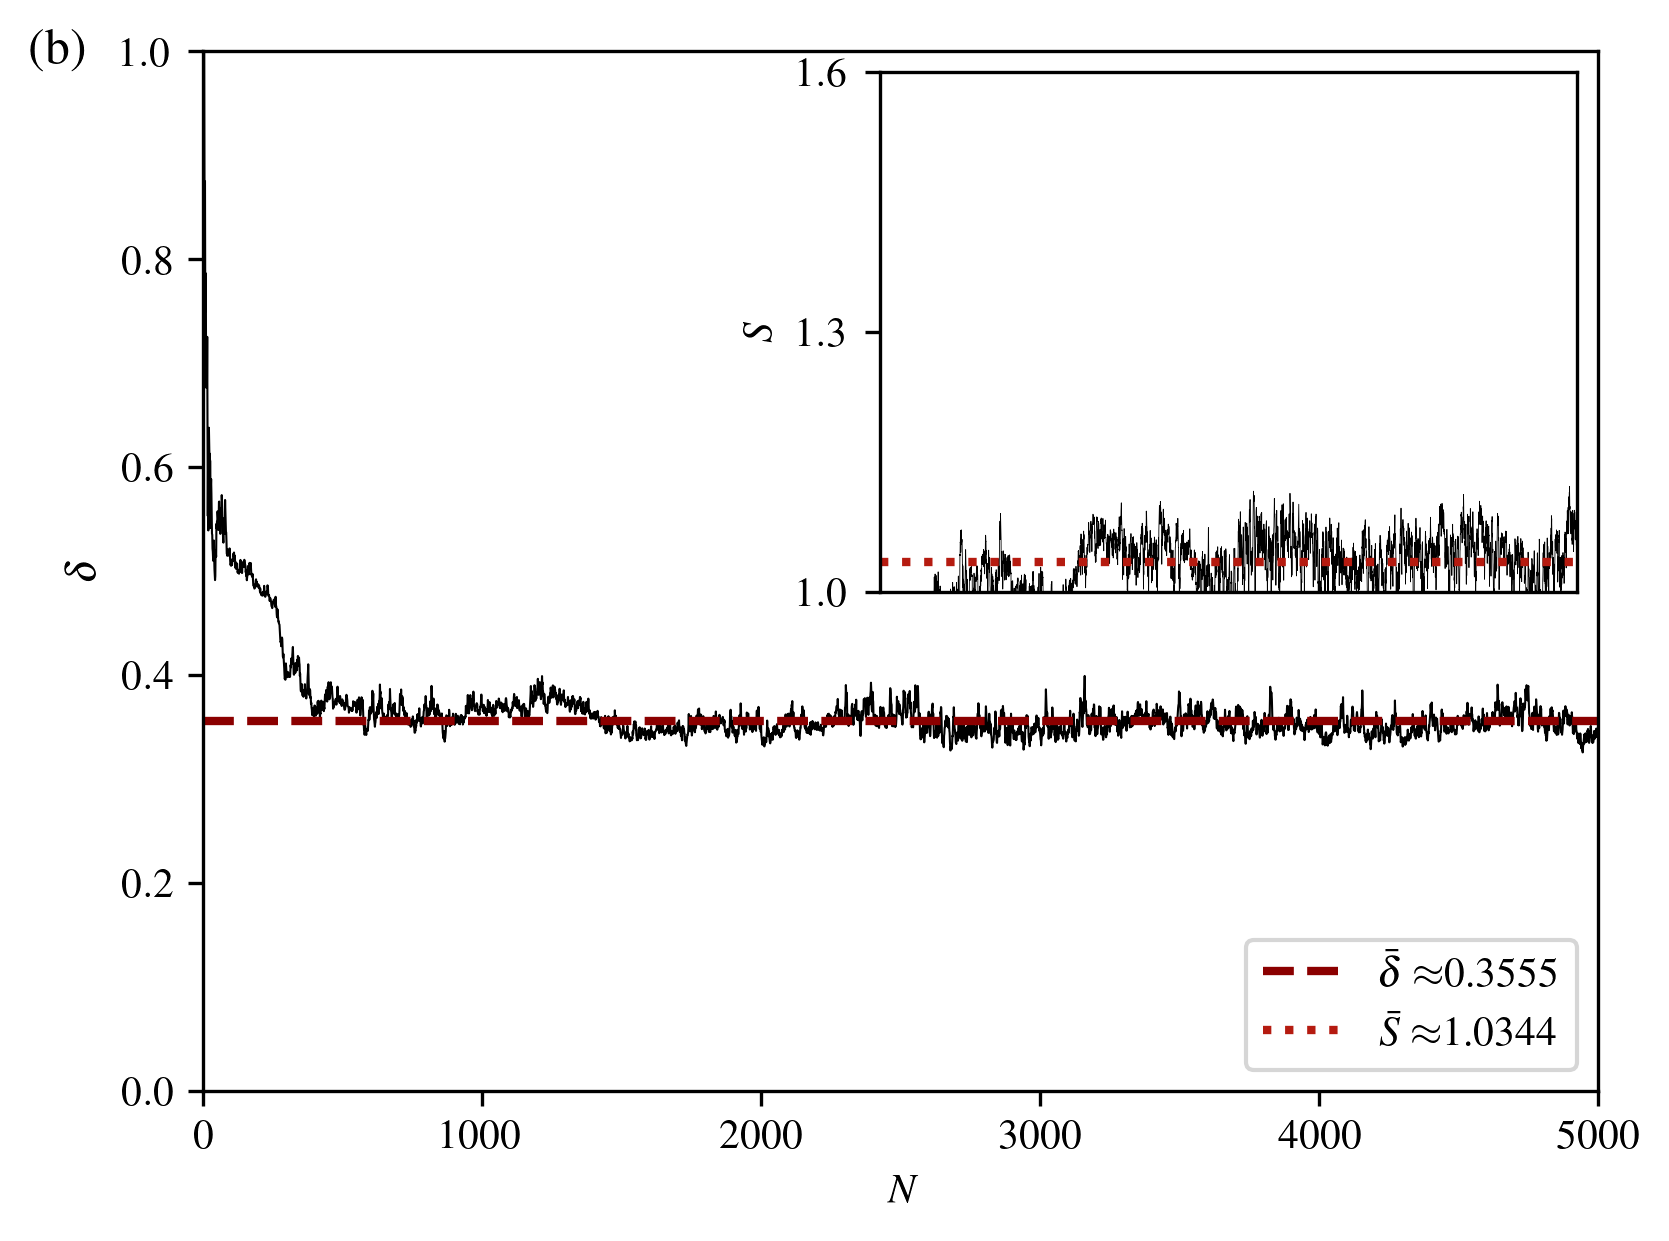

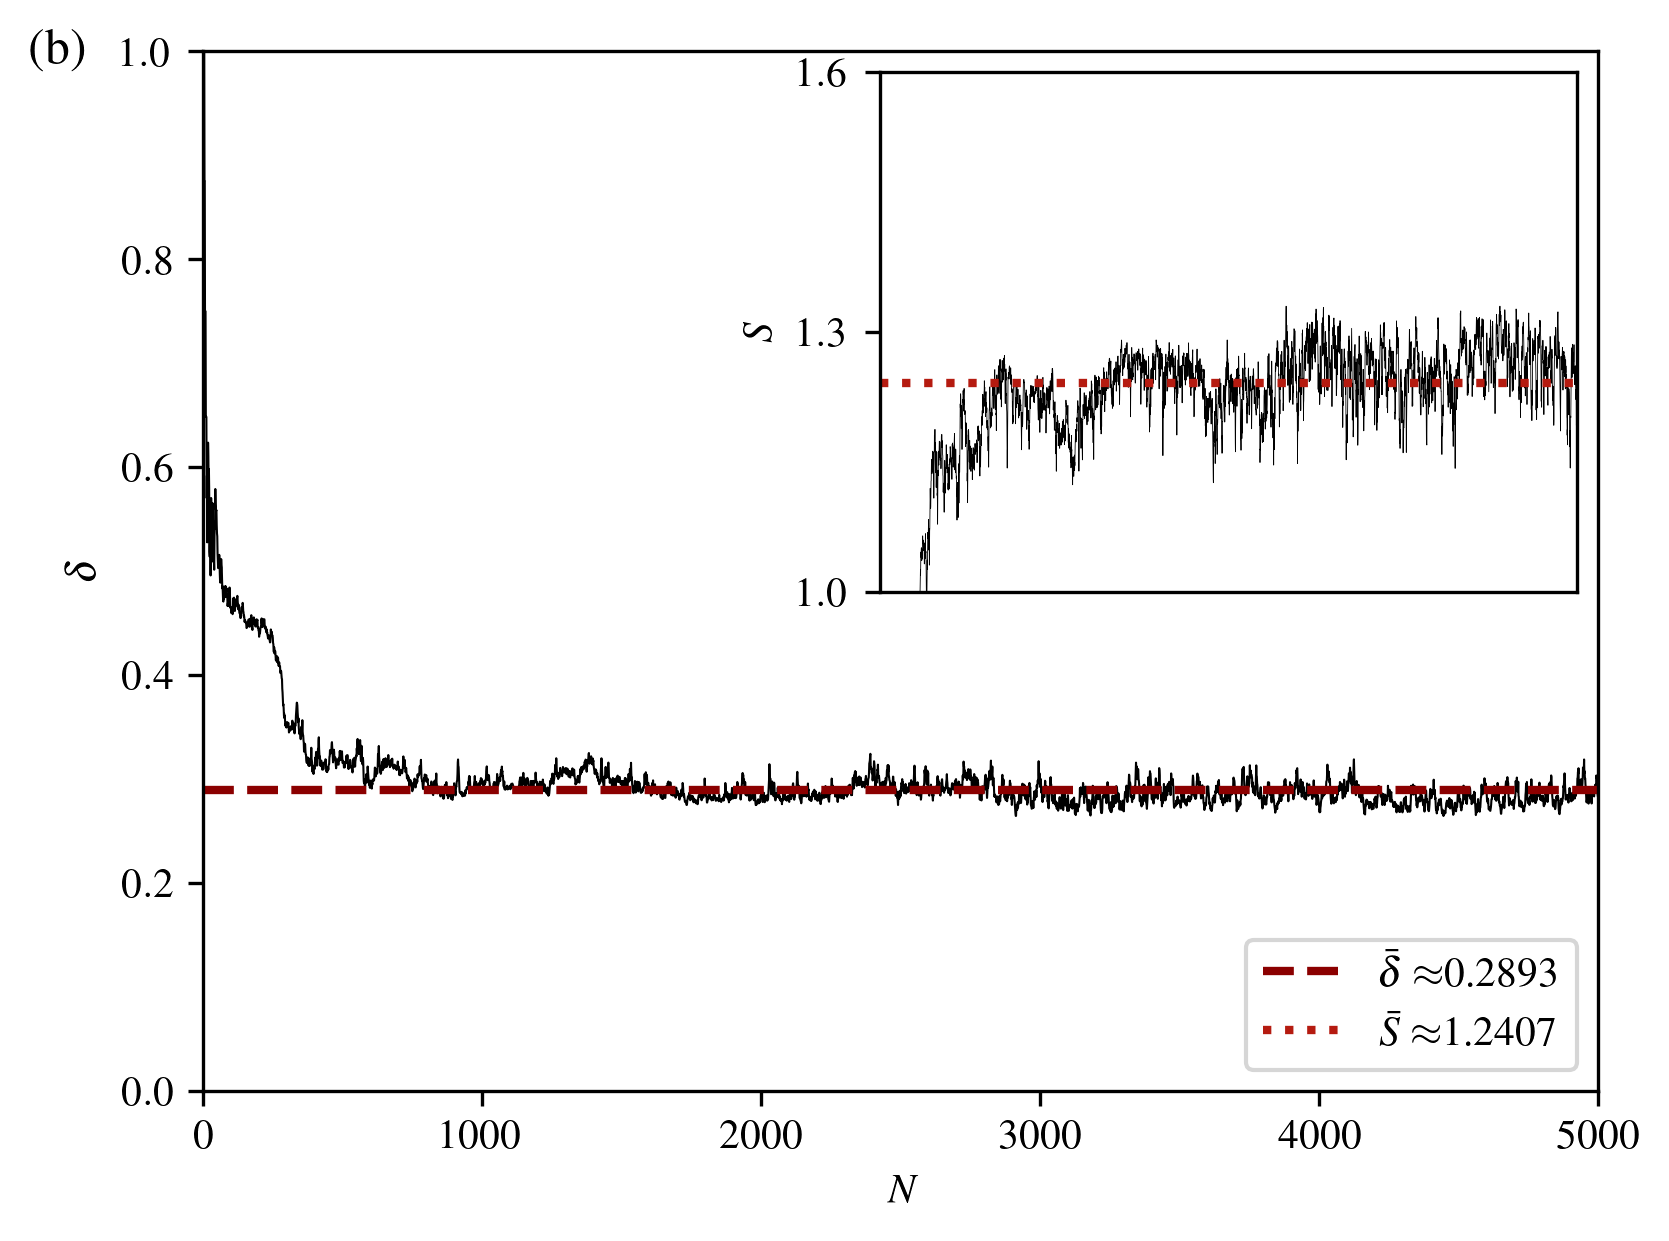

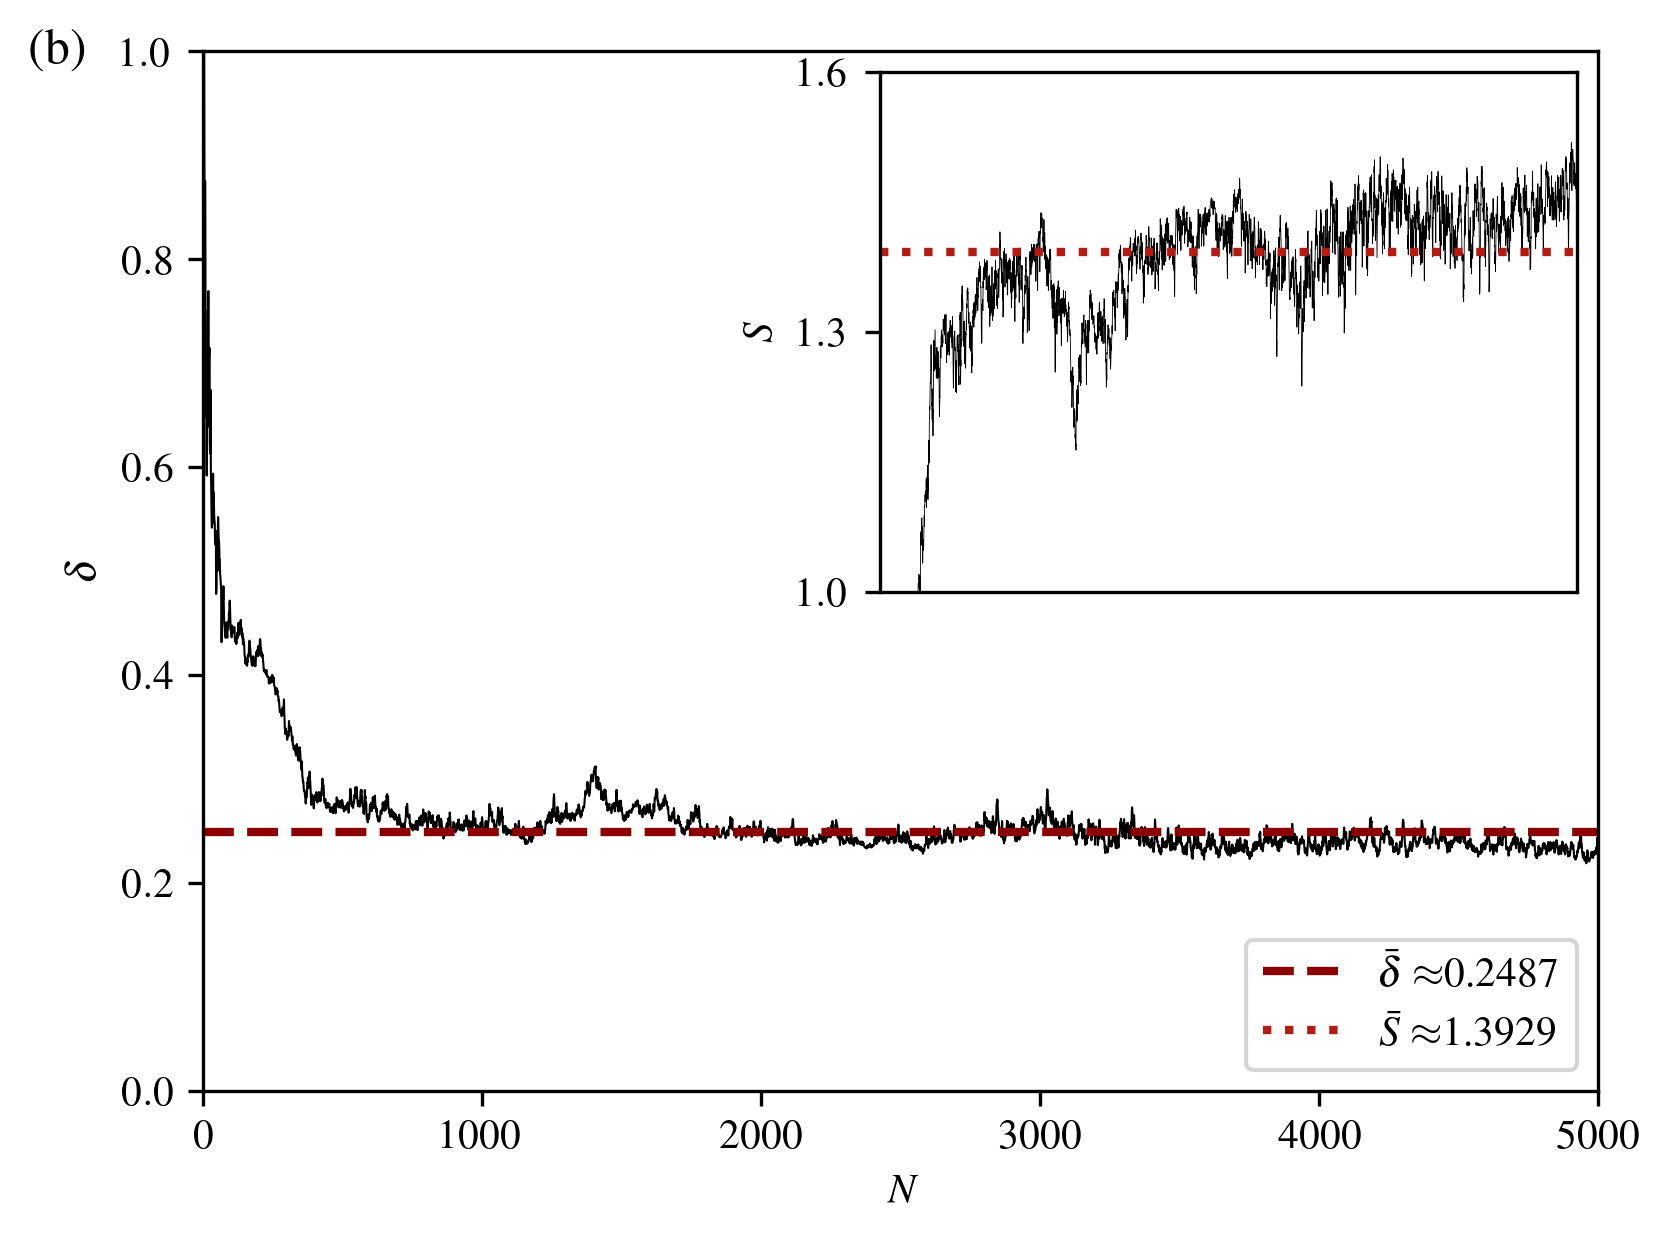

In [ ]:
averages = []
variances = []
qubit_nums = np.arange(2,11)
# qubit_nums = [10,]
for n_qubits in qubit_nums:
    # savefilepath = "C:/dev/Multicqw/biased_plots/"
    filename = "qsums_dim" + str(D) + "_q" + str(n_qubits) + ".txt"
    Qsums = np.genfromtxt(cwd+"/data/sums/"+interaction_pattern+filename, usecols = 0, delimiter=",", dtype = float)
    T = Qsums.size
    print(T)

    normQsums = ((3/4)**n_qubits) * Qsums
    entropy = - np.log(Qsums)
    normentropy = - np.log(normQsums)
    t = np.arange(0,T)
    avg = np.average(normQsums[500:])
    avgS = np.average(normentropy[500:])
    variance = np.var(normQsums[500:])
    entropy_variance = np.var(normentropy[500:])

    fig = plt.figure(figsize=(6,4.5),dpi=300)
    fig.clear()
    fig.text(0.045,0.88, '(b)', horizontalalignment='center', verticalalignment='center', fontsize=12)
    ax = fig.subplots()
    ax.plot(t, normQsums,'k-', lw=0.5)
    ax.set_xlim(0,T)
    ax.set_xlabel(r'$N$')
    ax.set_ylim(0,max(normQsums))
    # ax.set_ylim(0,7)
    ax.set_ylabel(r'$\delta$')
    ax.plot((0,T),(avg,avg),'--', label = r'$\bar{\delta} \approx $' + str(avg)[:6],lw=2,color="darkred")
    ax.plot((0,T),(1000,1000),':', label = r'$\bar{S} \approx $' + str(avgS)[:6],lw=2,color="#b51b10")
    inset = inset_axes(ax,width="50%",height="50%",loc="upper right")
    inset.plot(t, normentropy, 'k-', lw=0.2)
    inset.plot((0,T),(avgS,avgS),':', label = r'$\bar{\delta} \approx $' + str(avg)[:6],lw=2,color="#b51b10")
    inset.set_xlim(0,T)
    inset.set_ylabel(r'$S$')
    inset.tick_params(labelleft = True,labelbottom = False, labelright = False)
    inset.tick_params(axis='x',width=0)
    inset.set_ylim(1,1.6)
    inset.yaxis.set_ticks([1,1.3,1.6])
    inset.yaxis.set_label_position("left")
    inset.yaxis.set_ticks_position("left")
    ax.legend(loc='lower right')
    averages.append(avgS)
    variances.append(entropy_variance)

10000


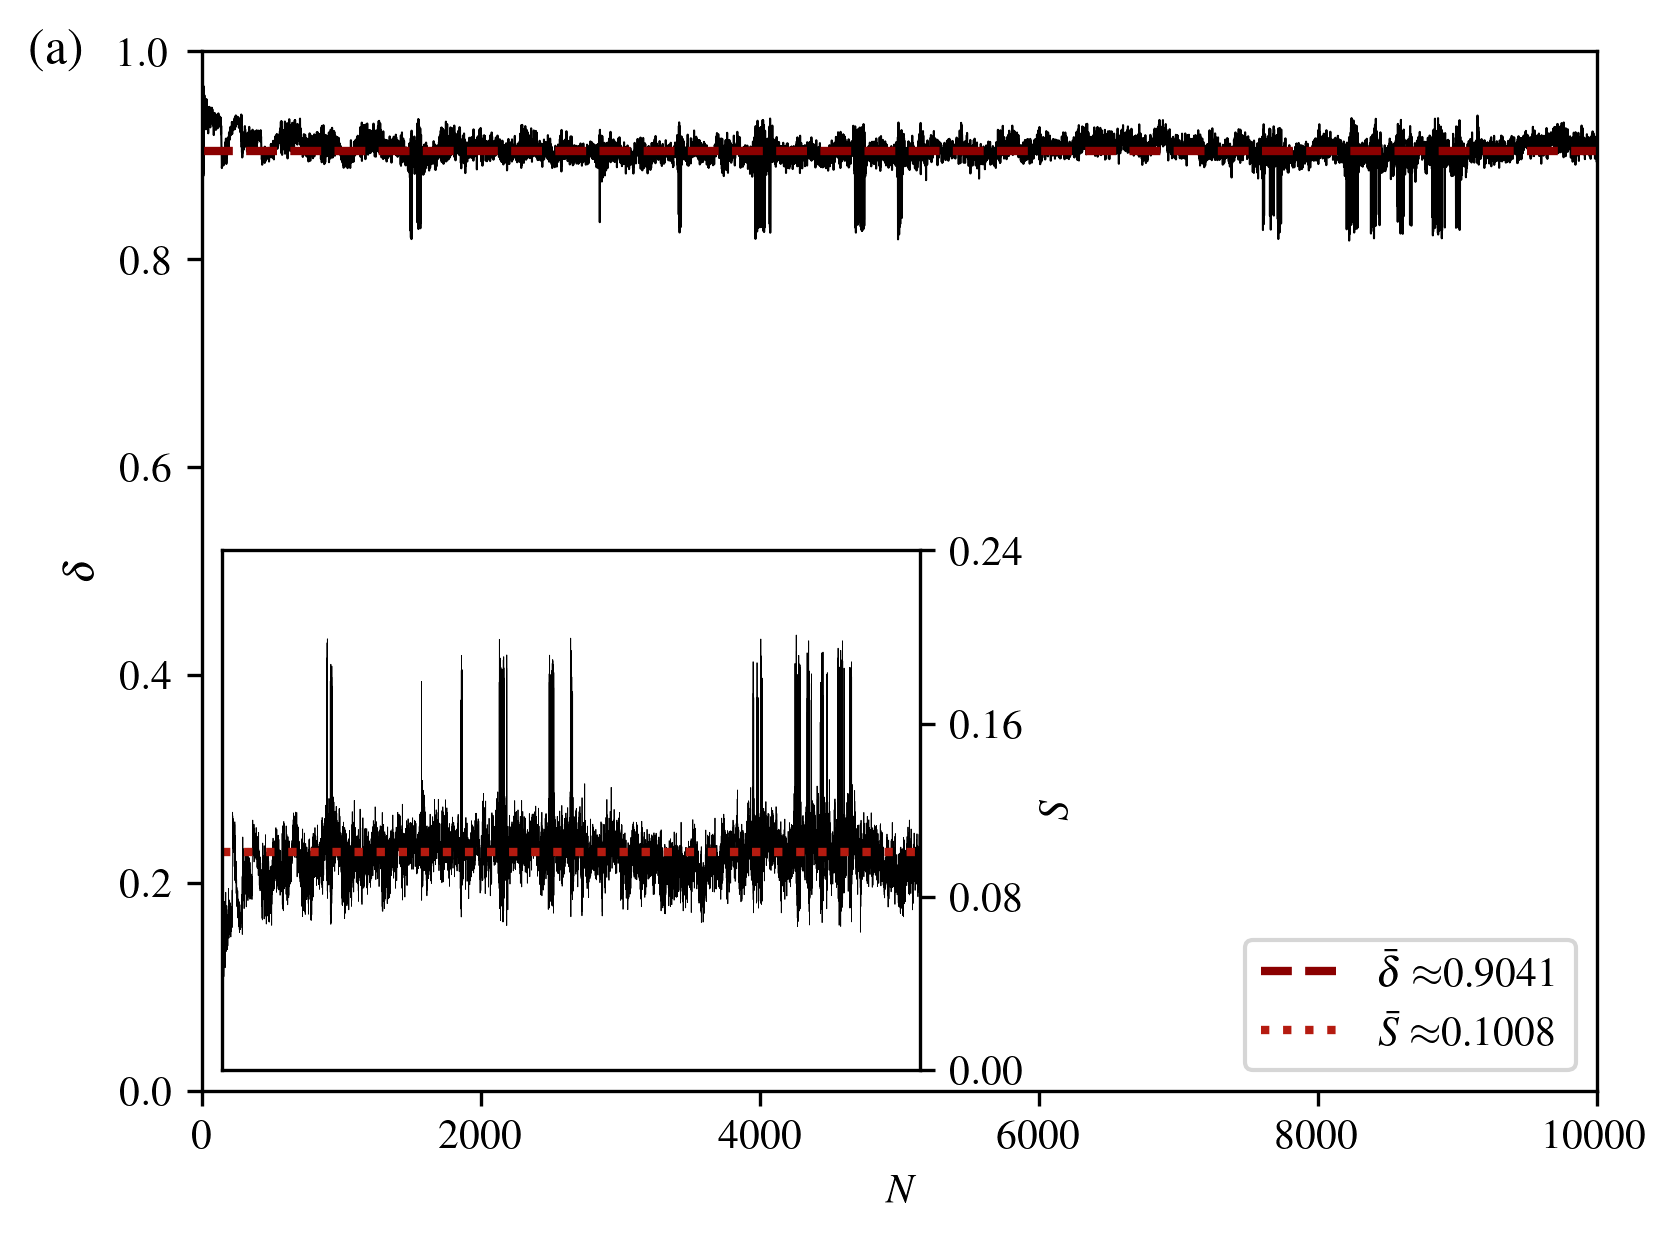

In [5]:
n_qubits = 2
interaction_pattern = "r"
cwd = os.getcwd()
filename = "qsums_dim" + str(D) + "_q" + str(n_qubits) + ".txt"
Qsums = np.genfromtxt(cwd+"/data/sums/"+interaction_pattern+filename, usecols = 0, delimiter=",", dtype = float)
T = Qsums.size
print(T)

normQsums = ((3/4)**n_qubits) * Qsums
entropy = - np.log(Qsums)
normentropy = - np.log(normQsums)
t = np.arange(0,T)
avg = np.average(normQsums[500:])
avgS = np.average(normentropy[500:])
variance = np.var(normQsums[500:])
entropy_variance = np.var(normentropy[500:])

fig = plt.figure(figsize=(6,4.5),dpi=300)
fig.clear()
fig.text(0.045,0.88, '(a)', horizontalalignment='center', verticalalignment='center', fontsize=12)
ax = fig.subplots()
ax.plot(t, normQsums,'k-', lw=0.5)
ax.set_xlim(0,T)
ax.set_xlabel(r'$N$')
ax.set_ylim(0,max(normQsums))
# ax.set_ylim(0,7)
ax.set_ylabel(r'$\delta$')
ax.plot((0,T),(avg,avg),'--', label = r'$\bar{\delta} \approx $' + str(avg)[:6],lw=2,color="darkred")
ax.plot((0,T),(1000,1000),':', label = r'$\bar{S} \approx $' + str(avgS)[:6],lw=2,color="#b51b10")
inset = inset_axes(ax,width="50%",height="50%",loc="lower left")
inset.plot(t, normentropy, 'k-', lw=0.2)
inset.plot((0,T),(avgS,avgS),':', label = r'$\bar{\delta} \approx $' + str(avg)[:6],lw=2,color="#b51b10")
inset.set_xlim(0,T)
inset.set_ylabel(r'$S$')
inset.tick_params(labelleft = True,labelbottom = False, labelright = False)
inset.tick_params(axis='x',width=0)
inset.set_ylim(0,0.24)
inset.yaxis.set_ticks(np.arange(0,0.241,0.08))
inset.yaxis.set_label_position("right")
inset.yaxis.set_ticks_position("right")
ax.legend(loc='lower right')

5000


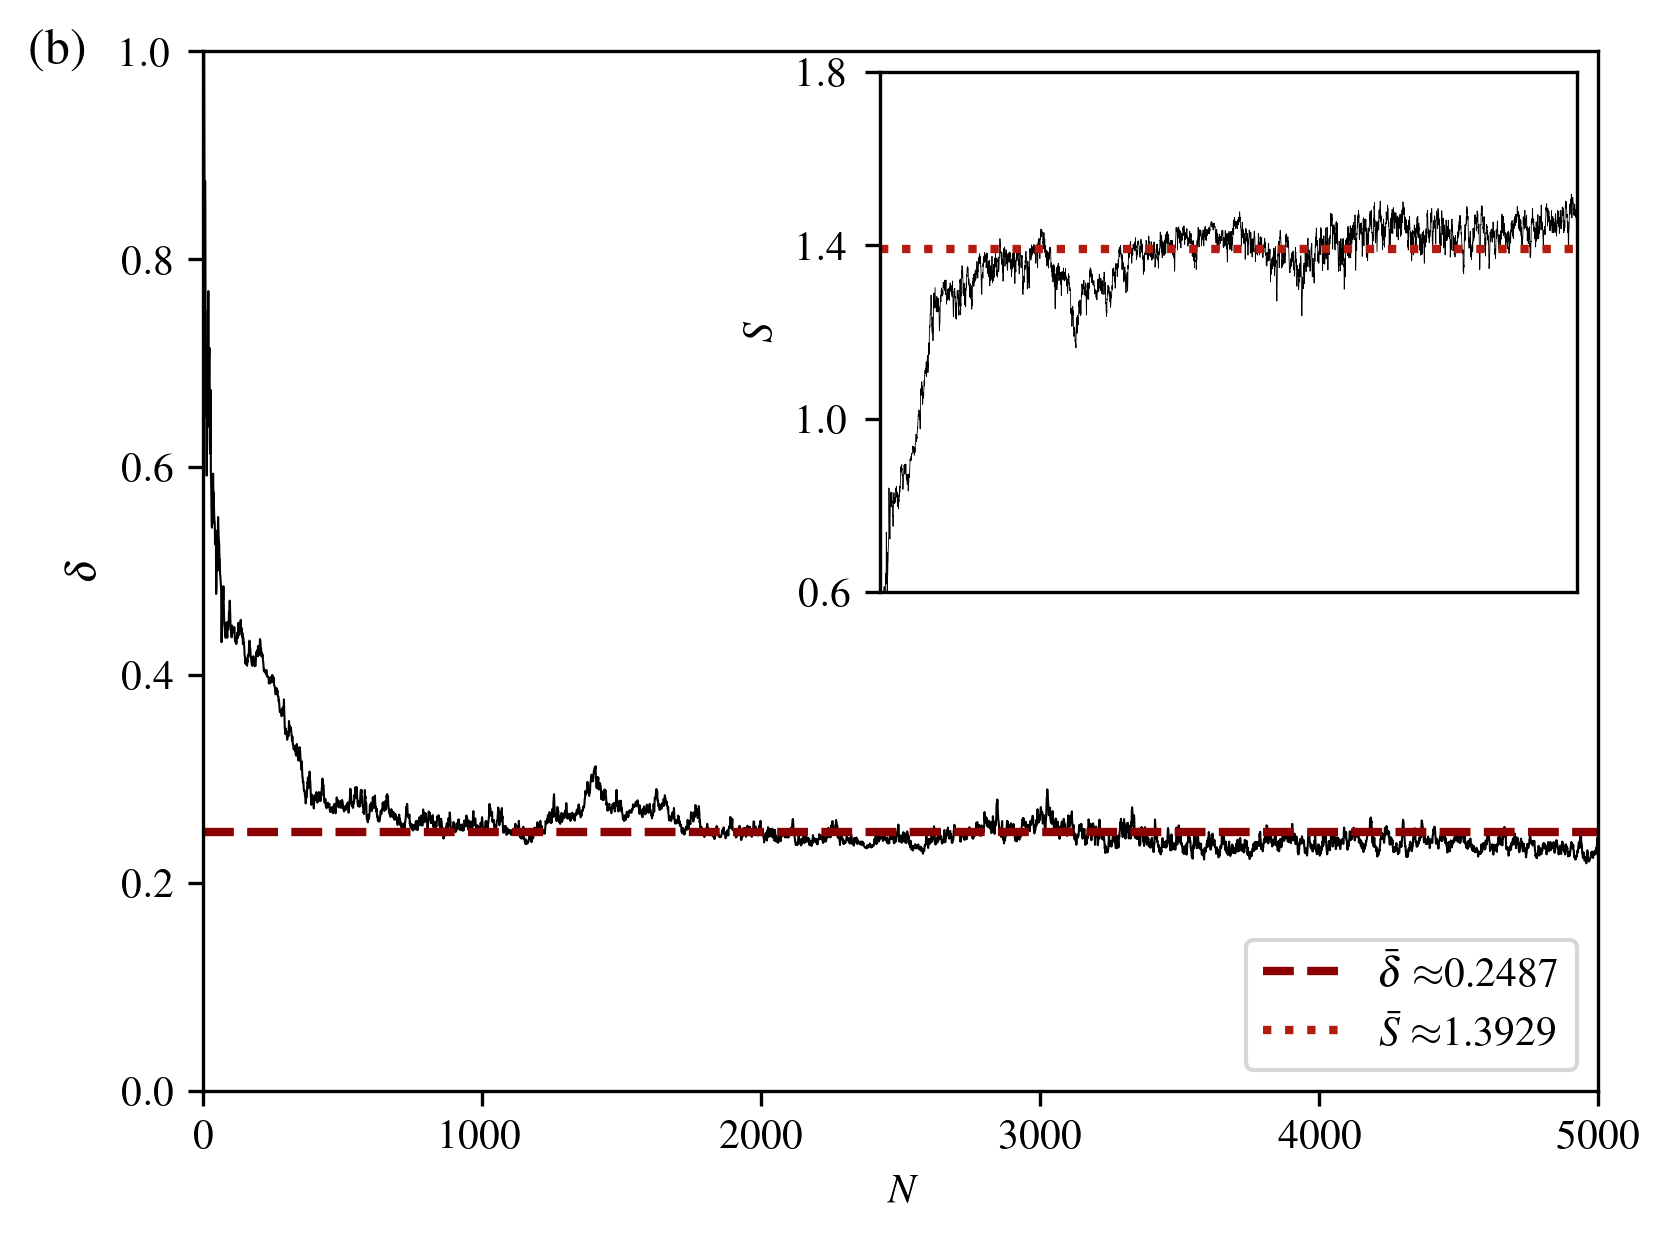

In [25]:
n_qubits = 10
interaction_pattern = "r"
cwd = os.getcwd()
filename = "qsums_dim" + str(D) + "_q" + str(n_qubits) + ".txt"
Qsums = np.genfromtxt(cwd+"/data/sums/"+interaction_pattern+filename, usecols = 0, delimiter=",", dtype = float)
T = Qsums.size
print(T)

normQsums = ((3/4)**n_qubits) * Qsums
entropy = - np.log(Qsums)
normentropy = - np.log(normQsums)
t = np.arange(0,T)
avg = np.average(normQsums[500:])
avgS = np.average(normentropy[500:])
variance = np.var(normQsums[500:])
entropy_variance = np.var(normentropy[500:])

fig = plt.figure(figsize=(6,4.5),dpi=300)
fig.clear()
fig.text(0.045,0.88, '(b)', horizontalalignment='center', verticalalignment='center', fontsize=12)
ax = fig.subplots()
ax.plot(t, normQsums,'k-', lw=0.5)
ax.set_xlim(0,T)
ax.set_xlabel(r'$N$')
ax.set_ylim(0,max(normQsums))
# ax.set_ylim(0,7)
ax.set_ylabel(r'$\delta$')
ax.plot((0,T),(avg,avg),'--', label = r'$\bar{\delta} \approx $' + str(avg)[:6],lw=2,color="darkred")
ax.plot((0,T),(1000,1000),':', label = r'$\bar{S} \approx $' + str(avgS)[:6],lw=2,color="#b51b10")
inset = inset_axes(ax,width="50%",height="50%",loc="upper right")
inset.plot(t, normentropy, 'k-', lw=0.2)
inset.plot((0,T),(avgS,avgS),':', label = r'$\bar{\delta} \approx $' + str(avg)[:6],lw=2,color="#b51b10")
inset.set_xlim(0,T)
inset.set_ylabel(r'$S$')
inset.tick_params(labelleft = True,labelbottom = False, labelright = False)
inset.tick_params(axis='x',width=0)
inset.set_ylim(0.6,1.8)
inset.yaxis.set_ticks(np.arange(0.6,1.8,0.4))
inset.yaxis.set_label_position("left")
inset.yaxis.set_ticks_position("left")
ax.legend(loc='lower right')

In [4]:
res = stats.linregress(qubit_nums,averages)

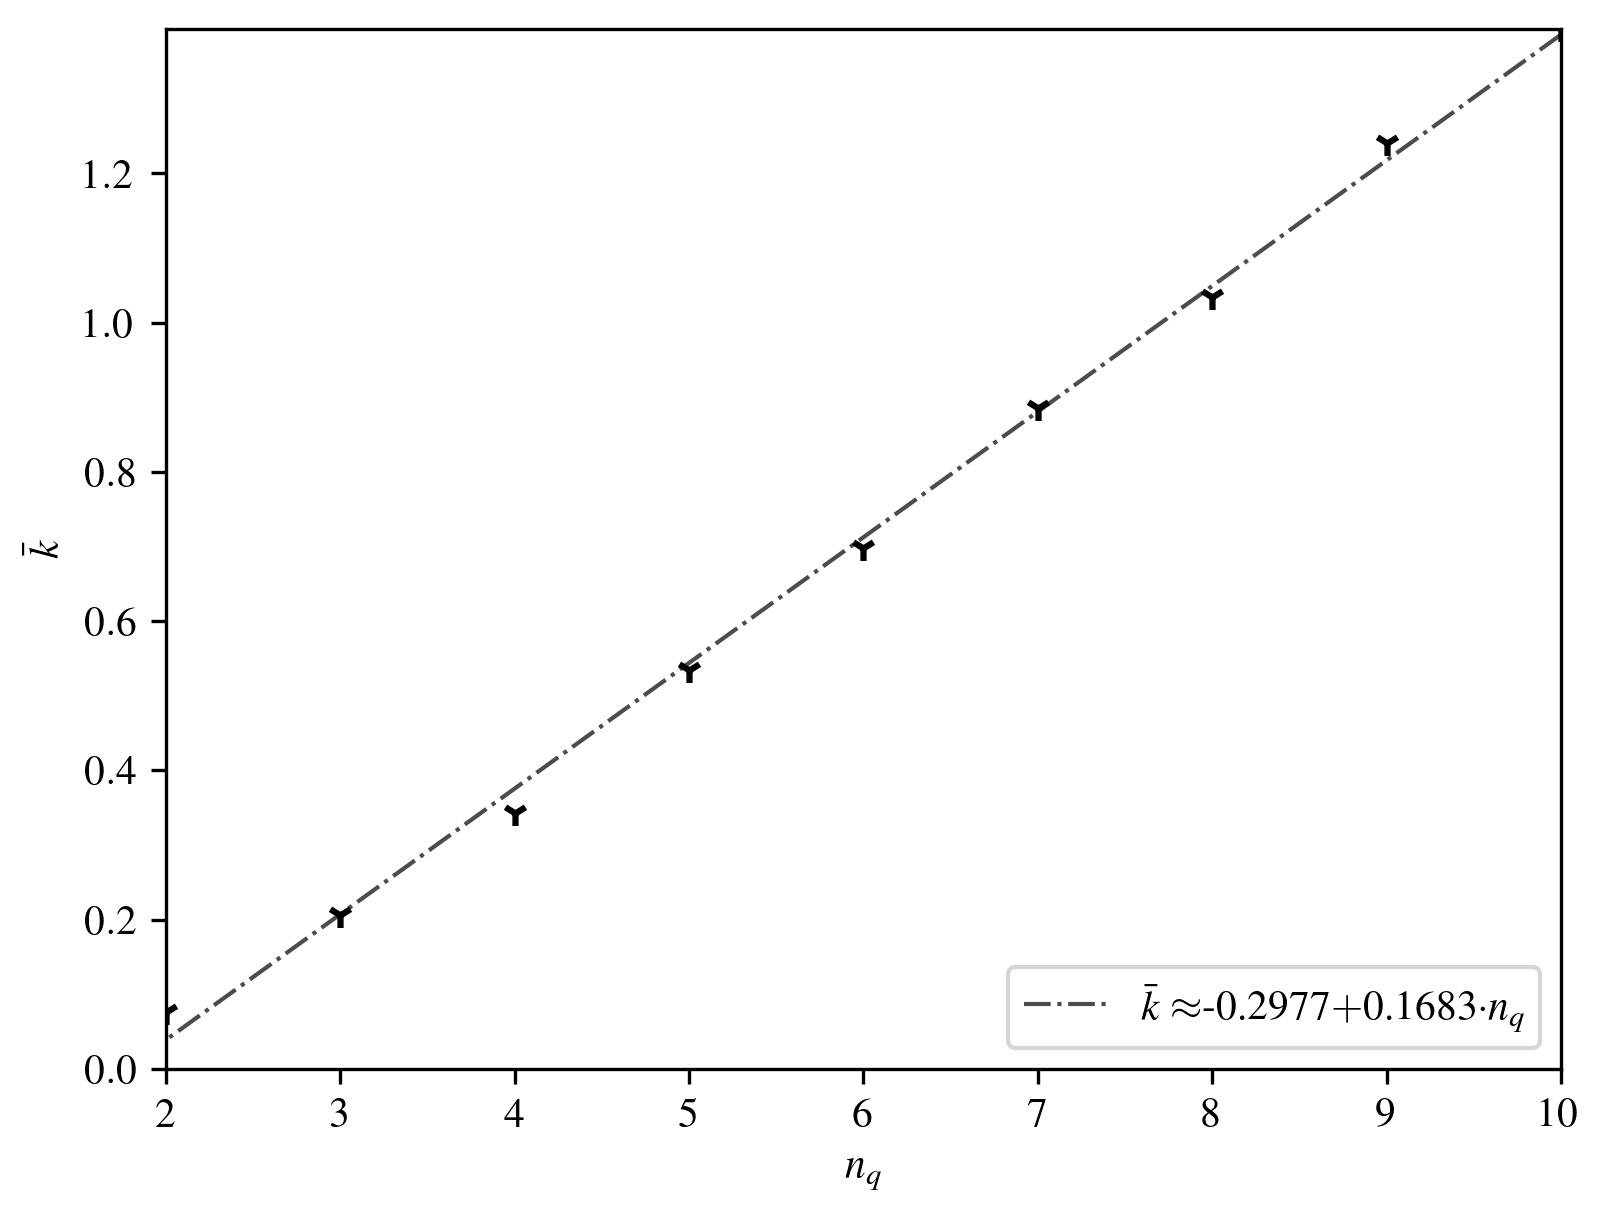

In [5]:
fig = plt.figure(figsize=(6,4.5),dpi=300)
fig.clear()
ax = fig.subplots()
# plt.title("avg(k)")
ax.set_xlim(2,10)
ax.set_xlabel(r'$n_q$')
ax.set_ylim(0,max(averages))
# ax.set_ylim(0,12)
ax.plot([0,max(qubit_nums)],[res.intercept,res.intercept+max(qubit_nums)*res.slope],'-.k',linewidth=1,alpha=0.7,label=r'$\bar{k} \approx $' + str(res.intercept)[:7] + r'$+$' + str(res.slope)[:6] + r'$\cdot n_q$')
ax.scatter(qubit_nums,averages,marker='1',c='k')
ax.set_ylabel(r'$\bar{k}$')
ax.legend(loc='lower right')
# ax.spines[['right', 'top']].set_visible(False)
# plt.savefig(savefilepath + "dim" + str(D) + "/"+"averages.png")

Text(0, 0.5, '$\\sigma(k)/\\bar{k}$')

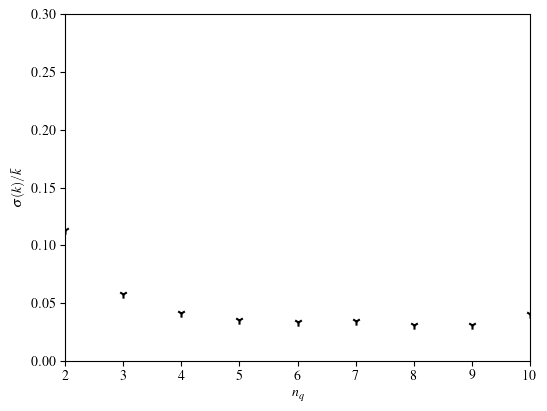

In [6]:
fig = plt.figure(figsize=(6,4.5))
fig.clear()
ax = fig.subplots()
# plt.title("avg(k)")
ax.scatter(qubit_nums,np.sqrt(variances)/averages,marker='1',c='k')
ax.set_xlim(2,max(qubit_nums))
ax.set_xlabel(r'$n_q$')
ax.set_ylim(0,0.3)
ax.set_ylabel(r'$\sigma(k)/\bar{k}$')
# plt.savefig(savefilepath + "dim" + str(D) + "/"+"averages.png")

In [7]:
print(np.sqrt(variances[8])/averages[8])

0.04033078030998931


In [8]:
print(res)

LinregressResult(slope=0.16837354145491834, intercept=-0.2977938996078119, rvalue=0.998944899283194, pvalue=1.2549319579599201e-10, stderr=0.002925705873050606, intercept_stderr=0.0191106307371679)
